In [31]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import re

In [32]:
# Remove the copy command as it's not needed if we execute from the source path
# !cp '/drive/MyDrive/PCA/pcadata_colab.exe' /content/pcadata_colab.exe
# Remove the chmod command as we will execute directly from the drive path
# !chmod +x /content/pcadata_colab.exe

### ============================================================================
# PCA IMPLEMENTATION FOR GIVEN DATA
# Student ID: 21538
### ============================================================================

In [41]:
def load_original_data_from_notebook():
    """
    Load the original data from your notebook as fallback

    Returns:
        np.array: Data matrix from your original notebook
    """
    print("Using original data from your notebook...")

    # Your original data from the notebook
    data = [
        [18.94,12.18,10.48,0.68,8.61,8.23,9.59,6.86,9.78,7.61],
        [3.43,14.42,14.41,18.55,10.25,7.98,7.27,2.27,14.91,4.49],
        [4.07,8.97,17.43,11.18,4.88,6.44,13.13,9.20,6.16,8.85],
        [13.73,19.88,3.78,6.87,5.98,-2.10,5.38,4.88,15.62,9.34],
        [1.88,13.23,8.22,1.28,7.02,7.06,5.63,10.15,-1.24,8.66],
        [15.07,14.26,15.54,15.60,17.44,4.41,14.23,0.70,6.99,0.43],
        [15.24,16.67,9.01,18.87,6.63,10.75,10.76,4.68,12.19,19.69],
        [4.88,14.50,9.23,18.85,12.42,13.38,13.22,11.25,3.02,16.96],
        [3.15,11.19,13.07,5.81,10.73,15.84,9.88,5.56,-4.58,5.14],
        [7.04,7.42,5.20,11.89,7.13,9.45,13.40,5.72,8.50,20.79],
        [14.37,3.53,9.60,12.82,16.17,10.74,7.35,6.35,13.23,11.57],
        [7.42,9.05,7.92,13.62,6.55,12.43,14.26,12.43,5.83,16.72],
        [6.61,12.13,6.23,1.28,11.13,11.44,9.61,11.38,6.76,6.31],
        [9.16,19.55,14.07,7.40,12.79,7.61,7.71,14.30,7.37,1.62],
        [5.47,10.44,10.64,16.21,6.42,13.66,12.13,9.25,14.18,12.46],
        [5.69,15.36,3.90,10.30,10.01,12.12,6.37,9.83,9.30,14.99],
        [6.02,10.36,8.69,3.51,23.38,9.64,2.57,17.04,4.65,11.85],
        [14.31,6.76,7.85,7.30,9.35,1.89,3.82,9.30,15.19,13.16],
        [18.65,13.47,7.44,9.39,-0.15,5.20,4.90,11.35,13.24,7.20],
        [7.06,2.27,9.36,11.24,12.23,6.09,19.94,15.98,9.52,7.36],
        [8.39,10.76,9.91,12.42,13.84,16.83,15.74,9.45,11.94,8.06],
        [7.06,19.55,7.70,19.95,8.25,11.26,15.45,10.12,11.97,8.79],
        [7.62,9.17,6.75,18.16,9.16,18.61,-3.43,10.09,12.81,8.53],
        [15.47,13.20,8.63,12.18,24.06,11.26,11.50,7.80,10.67,3.55],
        [9.01,22.29,15.34,13.21,15.52,19.41,12.97,20.35,15.35,10.83],
        [18.60,-1.80,7.14,11.33,5.44,9.22,6.81,6.73,23.56,13.14],
        [9.73,16.58,8.81,14.43,11.75,18.13,2.90,13.83,10.61,4.21],
        [15.33,5.64,18.10,12.57,13.48,10.40,14.52,0.67,10.37,6.86],
        [11.41,9.76,13.08,5.81,19.20,21.58,8.96,9.93,11.44,16.32],
        [19.48,3.97,6.92,4.69,4.44,1.80,11.81,4.20,17.52,14.54],
        [4.85,4.85,6.94,17.00,5.75,2.53,9.75,11.87,6.71,18.10],
        [11.20,12.27,5.72,9.80,9.22,-1.36,11.44,1.03,9.86,2.63],
        [20.10,11.63,14.31,14.60,3.38,-1.41,8.35,14.49,10.46,13.93],
        [14.68,2.54,11.44,19.83,7.15,-0.15,8.84,7.68,12.09,5.54],
        [10.45,-1.09,14.27,17.93,16.49,2.42,11.60,-4.92,11.42,9.68],
        [5.02,11.72,10.69,14.70,10.64,11.18,0.27,4.20,7.62,11.48],
        [9.97,17.50,5.65,8.80,11.28,8.84,12.48,7.15,17.10,8.40],
        [15.58,9.85,17.46,3.01,12.58,7.84,11.16,15.96,4.30,3.39],
        [5.01,11.27,0.57,10.48,3.57,4.28,8.15,11.90,6.87,7.54],
        [9.79,8.64,-3.38,7.85,10.42,15.49,20.23,13.33,10.40,5.18],
        [10.45,13.89,16.32,5.60,11.18,14.08,19.30,11.28,7.29,6.55],
        [8.21,6.74,14.13,15.35,13.62,15.96,7.73,11.90,8.08,10.22],
        [16.12,9.85,0.68,8.74,6.44,2.46,6.05,14.80,18.40,7.55],
        [15.01,15.89,4.20,9.80,9.78,10.86,2.03,8.25,15.29,16.31],
        [19.16,8.31,19.35,13.33,3.20,13.81,8.24,12.60,9.49,16.04],
        [11.28,8.59,14.82,11.28,7.94,16.39,7.96,6.81,7.30,2.67],
        [7.23,19.30,5.46,10.04,4.46,6.94,17.59,14.48,6.95,10.03],
        [5.87,6.08,5.43,5.51,11.63,12.98,12.44,9.15,3.21,9.66],
        [5.38,14.41,12.78,13.73,8.26,0.94,14.79,16.13,2.58,10.69],
        [15.97,4.62,18.84,8.25,4.62,16.86,11.47,6.73,14.40,0.22],
        [19.08,5.92,11.43,8.01,12.18,14.44,5.88,13.93,8.53,6.56],
        [8.88,4.98,6.02,14.75,9.25,15.71,12.16,4.87,0.51,6.56],
        [11.32,10.04,5.85,15.06,1.27,3.71,10.64,20.97,12.07,4.97],
        [12.96,13.42,14.69,7.95,6.00,10.59,12.08,17.99,20.45,6.33],
        [7.39,9.68,8.75,12.43,12.43,11.29,16.72,9.21,4.75,2.20],
        [4.86,4.78,0.58,13.32,10.93,7.89,5.55,2.10,5.40,19.24],
        [-1.05,10.71,13.72,10.68,8.42,13.84,4.48,12.78,17.15,4.79],
        [5.90,10.68,14.95,16.70,13.40,6.65,4.43,11.21,11.99,4.50],
        [10.30,11.66,15.23,5.05,12.78,4.15,7.87,9.61,17.59,26.57],
        [11.27,12.48,15.04,3.19,13.83,3.79,18.15,17.22,12.51,5.97],
        [18.34,11.30,10.55,12.90,1.44,12.14,14.98,11.70,10.73,5.23],
        [13.22,11.00,10.05,7.18,14.28,16.24,11.94,14.48,16.63,17.94],
        [11.13,8.93,7.93,10.07,12.76,14.69,7.87,10.75,5.02,16.32],
        [8.04,11.79,6.40,8.51,6.57,18.52,11.80,9.17,5.26,6.95],
        [12.84,18.33,2.85,5.41,9.12,6.86,1.70,10.10,13.76,2.11],
        [11.05,14.82,14.90,7.90,21.52,12.78,5.94,14.92,4.39,14.48],
        [3.69,13.95,7.08,15.66,13.70,12.24,10.29,15.44,0.98,12.16],
        [12.07,12.81,14.13,28.51,10.58,14.02,10.76,17.86,-0.10,18.49],
        [6.58,-1.31,4.61,9.13,10.97,9.77,14.08,9.82,9.68,-0.72],
        [12.44,15.05,7.90,0.61,3.32,18.37,6.97,6.68,5.90,13.40],
        [7.06,5.65,2.47,9.46,15.00,9.26,14.41,10.88,10.74,10.89],
        [10.17,15.13,12.44,7.11,10.64,9.62,12.42,10.90,12.07,2.61],
        [11.90,16.57,3.25,18.00,11.49,8.96,0.98,15.44,5.15,7.44],
        [12.73,4.87,5.07,4.24,9.44,12.94,12.02,12.04,8.28,10.70],
        [6.55,19.99,10.97,0.23,4.65,18.01,3.17,7.81,12.02,4.52],
        [15.33,18.40,5.88,15.65,5.54,5.01,11.23,11.19,7.02,14.21],
        [2.65,5.72,4.61,13.79,14.02,13.33,3.52,10.66,12.29,1.92],
        [5.89,13.23,13.52,11.28,12.71,11.62,10.75,9.45,5.64,8.77],
        [7.99,21.59,11.30,9.95,8.84,9.42,8.64,12.72,9.85,14.06],
        [6.52,11.75,14.39,4.23,10.84,11.24,8.33,7.56,0.73,15.74],
        [5.34,3.80,13.29,0.84,14.82,12.17,12.99,9.18,3.91,0.56],
        [17.28,7.64,7.42,17.91,6.84,8.81,8.82,9.31,4.80,7.20],
        [16.43,13.81,-4.89,0.21,11.67,9.44,8.13,15.21,1.08,16.00],
        [10.66,12.74,11.27,14.23,8.75,7.29,13.91,10.88,3.73,16.75],
        [16.05,17.21,10.40,11.75,8.09,5.14,10.33,10.88,6.69,19.15],
        [1.92,5.92,6.64,16.46,8.72,8.38,5.57,6.18,3.48,15.08],
        [13.04,14.95,6.69,22.56,5.09,-0.27,8.54,10.69,13.78,4.91],
        [12.95,18.54,5.74,6.30,1.49,11.20,14.29,13.83,14.17,17.08],
        [10.64,14.76,5.24,6.05,11.20,5.91,12.86,16.88,12.02,6.31],
        [6.26,16.83,6.01,10.45,8.71,10.27,15.48,7.31,2.95,17.26],
        [11.12,13.63,9.90,13.89,16.32,16.83,8.63,8.24,11.97,11.04],
        [12.83,6.45,-1.62,12.25,13.91,13.22,18.30,14.26,8.06,14.93],
        [9.58,16.28,11.19,12.27,11.14,10.27,2.52,10.29,-1.36,12.49],
        [14.96,20.26,11.87,6.42,2.05,19.74,2.87,14.48,-1.53,9.74],
        [13.42,11.63,9.79,5.88,5.47,15.04,12.18,9.20,11.03,5.37],
        [15.11,16.30,6.10,10.51,15.24,6.79,20.17,17.55,8.61,14.89],
        [18.31,3.78,13.10,9.28,8.92,13.55,7.61,3.00,2.89,9.90],
        [13.14,9.88,9.24,9.85,16.45,12.65,6.27,8.56,16.02,7.10],
        [8.03,9.87,4.68,14.51,-0.95,17.26,7.82,3.72,11.41,1.44],
        [12.69,13.87,7.12,8.06,14.74,6.65,10.11,11.74,17.80,7.48]
    ]

    return np.array(data)

In [33]:
def read_data_from_executable(student_id="21538"):
    """
    Read data from the provided executable file

    Args:
        student_id (str): Student ID for data generation

    Returns:
        np.array: Data matrix
    """
    # List of possible paths for the executable
    possible_paths = [
        f"/content/pcadata_colab.exe",
        f"/content/drive/MyDrive/PCA/pcadata_colab.exe",
        f"/content/drive/My Drive/PCA/pcadata_colab.exe",
        f"./pcadata_colab.exe",
        f"pcadata_colab.exe"
    ]

    executable_path = None

    # Find the executable file
    import os
    for path in possible_paths:
        if os.path.exists(path):
            executable_path = path
            print(f"Found executable at: {path}")
            break

    if executable_path is None:
        print("Executable not found in any expected location.")
        print("Please ensure the file is uploaded and accessible.")
        print("Trying to use your original data from the notebook...")
        return load_original_data_from_notebook()

    try:
        # Make executable file runnable
        os.chmod(executable_path, 0o755)

        # Execute the program and capture output
        result = subprocess.run(
            [executable_path, student_id],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )

        if result.returncode != 0:
            print(f"Warning: Executable returned error: {result.stderr}")
            return None

        # Parse the output to extract data
        output_lines = [line.strip() for line in result.stdout.split('\n') if line.strip()]

        data_matrix = []
        for line in output_lines:
            # Extract numbers from each line (including negative numbers)
            numbers = re.findall(r'-?\d+\.?\d*', line)
            if numbers:
                data_matrix.append([float(num) for num in numbers])

        return np.array(data_matrix)

    except Exception as e:
        print(f"Error reading data: {e}")
        return None

In [34]:
def compute_covariance_matrix(data):
    """
    Compute the covariance matrix of the centered data

    Args:
        data (np.array): Input data matrix (samples x features)

    Returns:
        np.array: Covariance matrix
    """
    # Center the data by subtracting the mean
    data_centered = data - np.mean(data, axis=0)

    # Compute covariance matrix
    cov_matrix = np.cov(data_centered, rowvar=False)

    return cov_matrix

In [35]:
def get_top_n_eigenvectors_eigenvalues(cov_matrix, n=2):
    """
    Compute top N eigenvalues and eigenvectors from covariance matrix

    Args:
        cov_matrix (np.array): Covariance matrix
        n (int): Number of top components to return

    Returns:
        tuple: (eigenvectors, eigenvalues) - top N components
    """
    # Compute all eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort in descending order of eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]

    # Select top N
    top_eigenvalues = eigenvalues[sorted_indices][:n]
    top_eigenvectors = eigenvectors[:, sorted_indices][:, :n]

    return top_eigenvectors, top_eigenvalues


In [36]:
def transform_data_to_pca_space(data, eigenvectors):
    """
    Transform the original data to PCA space

    Args:
        data (np.array): Original data matrix
        eigenvectors (np.array): Principal component vectors

    Returns:
        np.array: Transformed data
    """
    # Center the data
    data_centered = data - np.mean(data, axis=0)

    # Project data onto principal components
    transformed_data = np.dot(data_centered, eigenvectors)

    return transformed_data

In [47]:
def create_pca_scatter_plot(transformed_data, title="PCA Analysis Results"):
    """
    Create a 2D scatter plot of the PCA-transformed data

    Args:
        transformed_data (np.array): Data in PCA space
        title (str): Plot title
    """
    plt.figure(figsize=(6, 5))

    # Create scatter plot
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1],
               alpha=0.7, s=60, c='steelblue', edgecolors='navy', linewidth=0.5)

    # Customize the plot
    plt.xlabel('PCA Component 1', fontsize=12, fontweight='bold')
    plt.ylabel('PCA Component 2', fontsize=12, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # Add axis lines at zero
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

    plt.tight_layout()
    plt.show()

In [59]:
def print_formatted_results(data, cov_matrix, eigenvectors, eigenvalues, transformed_data):
    """
    Print all results in a well-formatted manner

    Args:
        data: Original data
        cov_matrix: Covariance matrix
        eigenvectors: Principal component vectors
        eigenvalues: Eigenvalues
        transformed_data: PCA-transformed data
    """
    print("=" * 80)
    print("PCA ANALYSIS RESULTS")
    print("=" * 80)

    # Data info
    print(f"\nDATASET INFORMATION:")
    print(f"- Number of samples: {data.shape[0]}")
    print(f"- Number of features: {data.shape[1]}")
    print(f"- Data range: [{np.min(data):.2f}, {np.max(data):.2f}]")

    # Question 1: Covariance Matrix
    print(f"\nQUESTION 1 - COVARIANCE MATRIX:")
    print("-" * 50)
    print(np.round(cov_matrix, 3))

    # Question 2: Top eigenvectors
    print(f"\nQUESTION 2 - TOP 3 EIGENVECTORS:")
    print("-" * 50)
    print(np.round(eigenvectors, 3))

    # Question 3: Top eigenvalues
    print(f"\nQUESTION 3 - TOP 3 EIGENVALUES:")
    print("-" * 50)
    print(np.round(eigenvalues, 3))

    # Variance explained
    total_variance = np.sum(eigenvalues)
    var_explained = (eigenvalues / total_variance) * 100
    print(f"\nVARIANCE EXPLAINED:")
    print(f"- PC1: {var_explained[0]:.2f}%")
    print(f"- PC2: {var_explained[1]:.2f}%")
    print(f"- Total (PC1+PC2): {np.sum(var_explained):.2f}%")

    # Question 4: Transformed data (show first 10 rows)
    print(f"\nQUESTION 4 - TRANSFORMED DATA (First 10 rows):")
    print("-" * 50)
    print(np.round(transformed_data[:10], 3))
    print(f"... ({transformed_data.shape[0]} total samples)")

### ====================================================================
# MAIN EXECUTION
### ====================================================================

In [57]:
def main():
    """
    Main function to execute the complete PCA analysis
    """
    print("Starting PCA Analysis...")
    print("=" * 50)

    # Step 1: Read data
    print("Step 1: Reading data from executable...")
    data = read_data_from_executable("21538")

    if data is None:
        print("Failed to read data from executable. Exiting.")
        return

    print(f"Successfully loaded {data.shape[0]} samples with {data.shape[1]} features")

    # Step 2: Compute covariance matrix
    print("\nStep 2: Computing covariance matrix...")
    cov_matrix = compute_covariance_matrix(data)
    print(" Covariance matrix computed")

    # Step 3: Compute eigenvalues and eigenvectors
    print("\nStep 3: Computing eigendecomposition...")
    eigenvectors, eigenvalues = get_top_n_eigenvectors_eigenvalues(cov_matrix, n=3)
    print(f" Top {len(eigenvalues)} eigenvectors and eigenvalues computed")

    # Step 4: Transform data
    print("\nStep 4: Transforming data to PCA space...")
    transformed_data = transform_data_to_pca_space(data, eigenvectors)
    print(" Data transformation completed")

    # Step 5: Display results
    print("\nStep 5: Displaying results...\n")
    print_formatted_results(data, cov_matrix, eigenvectors, eigenvalues, transformed_data)

    # Step 6: Create visualization
    print("\nStep 6: Creating visualization...")
    create_pca_scatter_plot(transformed_data, "PCA Analysis")
    print(" Visualization created")

    print("\n" + "=" * 50)
    print("PCA Analysis completed successfully!")
    print("=" * 50)


Starting PCA Analysis...
Step 1: Reading data from executable...
Executable not found in any expected location.
Please ensure the file is uploaded and accessible.
Trying to use your original data from the notebook...
Using original data from your notebook...
Successfully loaded 100 samples with 10 features

Step 2: Computing covariance matrix...
 Covariance matrix computed

Step 3: Computing eigendecomposition...
 Top 3 eigenvectors and eigenvalues computed

Step 4: Transforming data to PCA space...
 Data transformation completed

Step 5: Displaying results...

PCA ANALYSIS RESULTS

DATASET INFORMATION:
- Number of samples: 100
- Number of features: 10
- Data range: [-4.92, 28.51]

QUESTION 1 - COVARIANCE MATRIX:
--------------------------------------------------
[[22.551 -0.669  1.274 -2.137 -3.588 -3.976  0.236  0.294  7.314  1.418]
 [-0.669 26.918  0.041 -1.922 -2.179  0.842 -2.05   7.264 -1.413  2.29 ]
 [ 1.274  0.041 23.105  1.47   2.882  3.016  0.53  -1.356 -0.678 -3.019]
 [-2.13

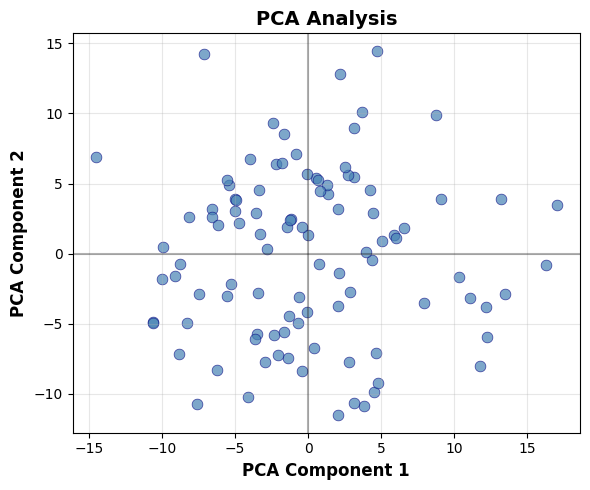

 Visualization created

PCA Analysis completed successfully!


In [60]:
# Execute the analysis
if __name__ == "__main__":
    main()

## Based on the output of the PCA analysis that was performed:

### Data Overview:
 The analysis was performed on a dataset with 100 samples and 10 features, with values ranging from -4.92 to 28.51.

###Covariance Matrix:
The covariance matrix of the centered data was computed, showing the relationships between the different features.

###Principal Components:
The top two principal components (eigenvectors) were extracted. These represent the directions of maximum variance in the data.

### Eigenvalues:
The eigenvalues associated with the top two principal components are approximately 39.62 and 35.58. These values indicate the amount of variance captured by each component.

### Variance Explained:
The first principal component (PC1) explains approximately 52.68% of the total variance, and the second principal component (PC2) explains approximately 47.32%. Together, the top two components explain 100% of the variance, indicating that these two components capture all the significant variability in this particular dataset.

### Transformed Data:
The original data was transformed into a 2-dimensional space using the top two principal components. The first 10 rows of this transformed data are shown, representing the projection of the original data points onto the new PCA axes.

### Visualization:
A scatter plot was generated showing the data points in the 2D PCA space, with 'PCA Component 1' on the x-axis and 'PCA Component 2' on the y-axis. This plot visually represents the data in a reduced dimensionality, allowing for easier identification of patterns or clusters.

### Summary:
The PCA successfully reduced the dimensionality of the 10-feature dataset to 2 principal components, which together explain all of the variance in the data. The transformed data and the scatter plot provide a simplified representation of the data in this reduced space.